In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/out_visit.csv',index_col='Unnamed: 0')
df.head()

,monthly_spend,visit_count
0,224.835708,8.715575
1,193.086785,9.121569
2,232.384427,10.166102
3,276.151493,10.107604
4,188.292331,5.244661


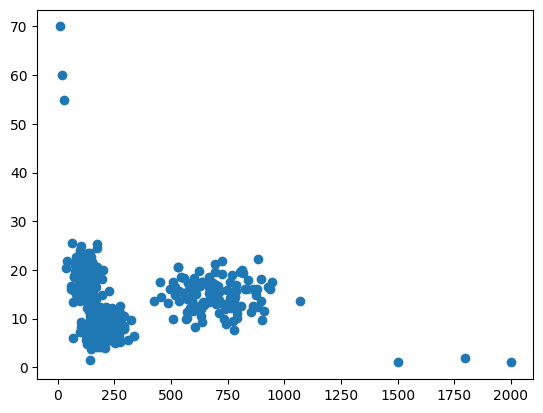

In [6]:
plt.Figure(figsize=(7,5))
plt.scatter(df['monthly_spend'],df['visit_count'])
plt.show()

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 데이터스케일링 필수

scaled_data = scaler.fit_transform(df)
scaled_data

array([[-3.16163001e-01, -7.07120618e-01],
       [-4.33205588e-01, -6.45133124e-01],
       [-2.88334604e-01, -4.85653041e-01],
       [-1.26987063e-01, -4.94584615e-01],
       [-4.50880370e-01, -1.23706207e+00],
       [-4.50877343e-01, -1.10275060e+00],
       [-1.16631123e-01, -6.59103181e-01],
       [-2.66262353e-01, -6.59484674e-01],
       [-4.94255983e-01, -6.59099388e-01],
       [-3.07712444e-01,  3.60100327e-01],
       [-4.93139581e-01, -6.42047147e-01],
       [-4.93565753e-01, -4.69617173e-01],
       [-3.63120216e-01, -5.25059768e-01],
       [-7.60385915e-01, -6.17465330e-01],
       [-7.25665959e-01, -9.12646108e-01],
       [-5.11363793e-01, -5.84615173e-01],
       [-5.94410370e-01, -1.05236603e+00],
       [-3.49796251e-01, -8.88690313e-01],
       [-5.75091781e-01, -9.64586338e-01],
       [-6.68043269e-01, -7.91373858e-01],
       [-1.37563848e-01, -1.09567736e-01],
       [-4.49336263e-01, -1.38656572e+00],
       [-3.95272825e-01, -6.06817703e-01],
       [-6.

In [20]:
dbscan_model = DBSCAN(eps=0.5 , min_samples=5)
labels = dbscan_model.fit_predict(scaled_data)
print('이상치 데이터의 갯수 : ',(labels==-1).sum())

이상치 데이터의 갯수 :  7


In [21]:
set(labels)

{np.int64(-1), np.int64(0), np.int64(1)}

In [22]:
df['cluster'] = labels
df.head()

,monthly_spend,visit_count,cluster
0,224.835708,8.715575,0
1,193.086785,9.121569,0
2,232.384427,10.166102,0
3,276.151493,10.107604,0
4,188.292331,5.244661,0


In [23]:
print('군집별 고객수 : ',df['cluster'].value_counts())

군집별 고객수 :  cluster
 0    340
 1    119
-1      7
Name: count, dtype: int64


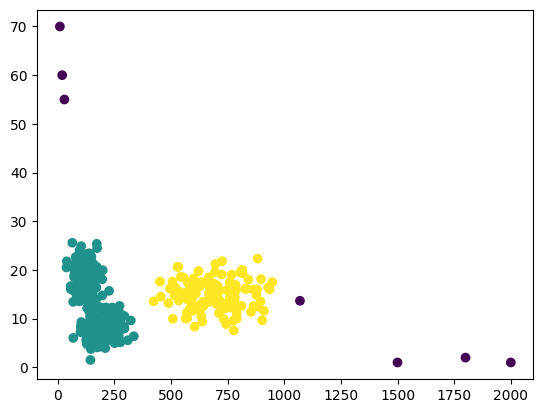

In [24]:
plt.Figure(figsize=(7,5))
plt.scatter(df['monthly_spend'],df['visit_count'],c=df['cluster'])
plt.show()